# Gradient edge detection filter

pyclesperanto implement multiple filters for edge-detection.

> See also [Wikipedia: Edge detection](https://en.wikipedia.org/wiki/Edge_detection)

In [1]:
import pyclesperanto as cle
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

cle.select_device()

(OpenCL) AMD Ryzen 9 7950X 16-Core Processor (OpenCL 3.0 (Build 0))
	Vendor:                      Intel(R) Corporation
	Driver Version:              2025.20.10.0.23_160000
	Device Type:                 CPU
	Compute Units:               32
	Global Memory Size:          127926 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         63963 MB
	Max Clock Frequency:         0 MHz
	Image Support:               Yes

array([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]],
      shape=(254, 256), dtype=float32, mtype=buffer)
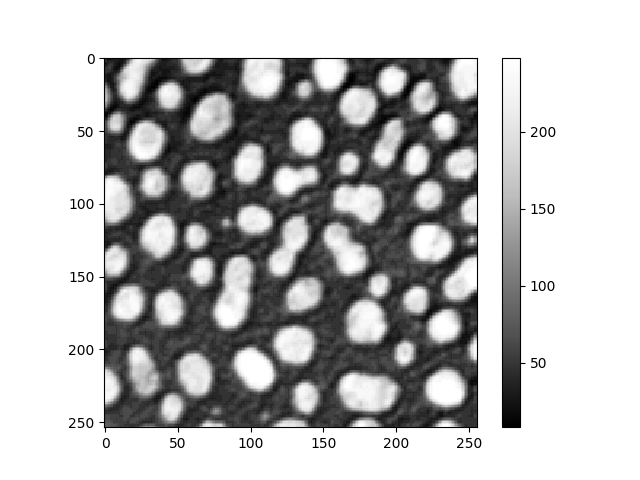
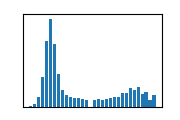

In [2]:
blobs = cle.push(imread('https://samples.fiji.sc/blobs.png').squeeze().astype(np.float32))
blobs

## Sobel operator

> See also [Wikipedia: Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator)

array([[ 68.8186  ,  86.162636,  40.792156, ..., 132.42357 ,  90.50967 ,
         64.      ],
       [104.307236, 132.42357 ,  60.926186, ..., 124.45079 , 132.42357 ,
        128.      ],
       [ 67.88225 , 120.26637 ,  57.68882 , ...,  68.8186  ,  68.8186  ,
         64.      ],
       ...,
       [ 60.926186,  46.647614,  32.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 80.      ,  40.792156,  11.313708, ...,   0.      ,   0.      ,
          0.      ],
       [ 60.926186,  57.68882 ,  25.298222, ...,   0.      ,   0.      ,
          0.      ]], shape=(254, 256), dtype=float32, mtype=buffer)
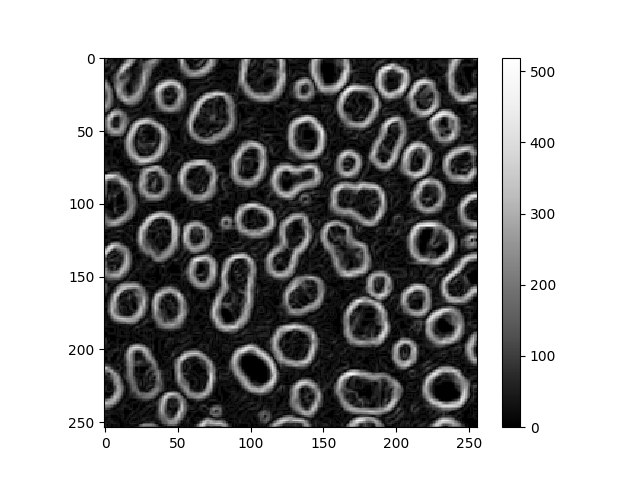
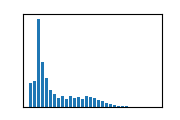

In [3]:
blobs_sobel = cle.sobel(blobs)
blobs_sobel

## Laplace operator

> See also [Wikipedia: Discrete Laplace operator](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

array([[-16., -24., -32., ..., -40., -96., -48.],
       [ 64.,   8., -56., ...,  40., -40.,   0.],
       [128.,  64., -88., ...,  40.,  16.,  48.],
       ...,
       [-16.,  40.,  24., ...,   0.,   0.,   0.],
       [-24., -16.,  -8., ...,   0.,   0.,   0.],
       [ 64.,  24., -16., ...,   0.,   0.,   0.]],
      shape=(254, 256), dtype=float32, mtype=buffer)
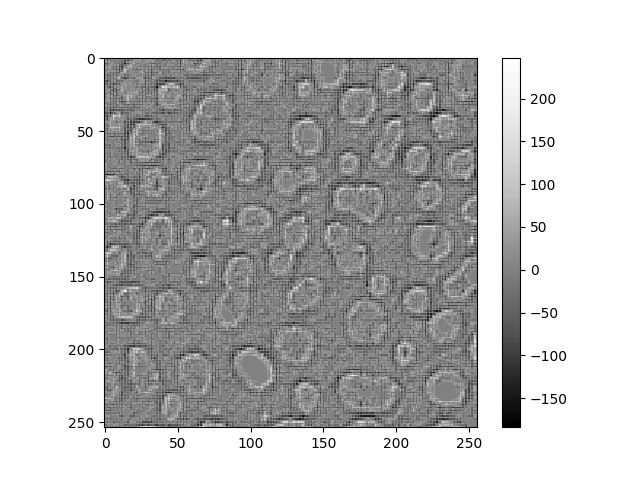
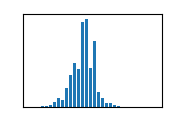

In [4]:
blobs_laplace = cle.laplace(blobs)
blobs_laplace

## Laplacian of Gaussian (LoG)

Also kown as the Mexican hat filter
> See also [Wikipedia: Ricker wavelet](https://en.wikipedia.org/wiki/Ricker_wavelet)

array([[ 7.5574722e+00, -4.4327087e+00, -8.4331589e+00, ...,
        -1.2825226e+01, -1.8233612e+01, -2.8584320e+01],
       [ 1.3092461e+01,  1.7703476e+00, -2.1149101e+00, ...,
        -1.3137817e-01, -3.0074005e+00, -1.0908264e+01],
       [ 9.6622581e+00,  1.4873314e+00, -1.0299149e+00, ...,
         3.1016235e+00,  9.9256897e-01, -5.4479065e+00],
       ...,
       [ 7.8439331e-01,  2.0144730e+00,  3.0335693e+00, ...,
        -2.0529175e-01, -3.6826706e-01, -3.6431885e-01],
       [ 4.8791809e+00,  3.3652802e+00,  3.4453049e+00, ...,
        -8.0345154e-02, -1.7398834e-01, -2.1364594e-01],
       [ 1.7403748e+01,  1.1413010e+01,  8.4630966e+00, ...,
        -2.3200989e-02, -6.7848206e-02, -1.0802460e-01]],
      shape=(254, 256), dtype=float32, mtype=buffer)
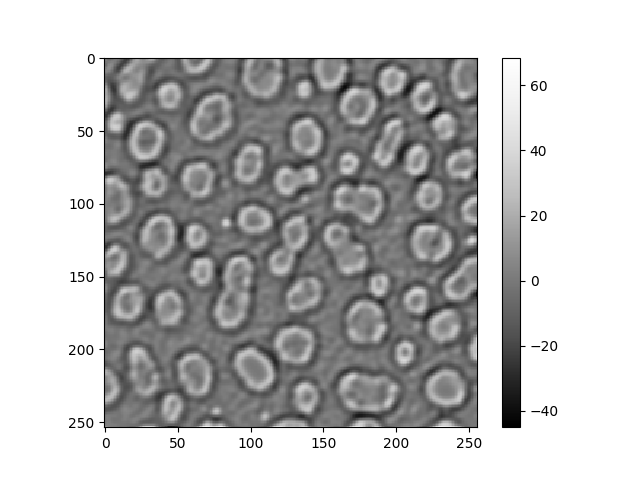
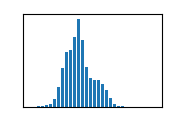

In [5]:
blobs_laplacian_of_gaussian = cle.laplace(cle.gaussian_blur(blobs, sigma_x=2, sigma_y=2))
blobs_laplacian_of_gaussian

array([[ 0.7280884 , -2.0713463 , -2.746067  , ..., -2.3328247 ,
        -3.2957306 , -8.296143  ],
       [ 1.801384  , -0.4489708 , -0.7979355 , ...,  1.9600983 ,
         1.2945099 , -3.1304932 ],
       [ 1.3617897 , -0.5129509 , -0.86740494, ...,  2.0793915 ,
         1.4772491 , -2.5575867 ],
       ...,
       [ 2.9277496 ,  0.15536499,  0.1328125 , ..., -1.0572815 ,
        -0.771595  , -1.2406845 ],
       [ 3.7949448 ,  0.58219147,  0.51387024, ..., -1.1535263 ,
        -0.86091995, -1.5314636 ],
       [10.268181  ,  6.282051  ,  5.6941986 , ..., -0.45279694,
        -0.52127457, -1.5948486 ]], shape=(254, 256), dtype=float32, mtype=buffer)
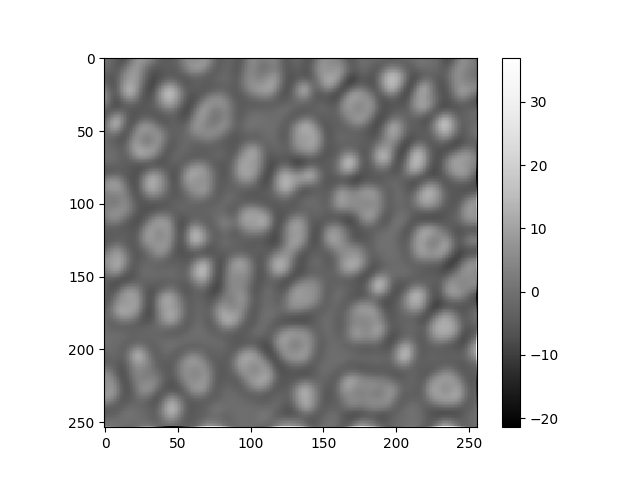
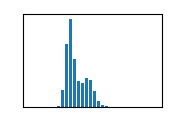

In [6]:
blobs_laplacian_of_gaussian = cle.laplace(cle.gaussian_blur(blobs, sigma_x=5, sigma_y=5))
blobs_laplacian_of_gaussian

## Local Variance filter

array([[149.9526   , 140.52812  , 123.98716  , ..., 307.28387  ,
        317.07535  , 309.95038  ],
       [152.46169  , 143.4219   , 129.09291  , ..., 270.80988  ,
        283.00574  , 281.808    ],
       [153.38847  , 144.92549  , 133.23697  , ..., 231.50345  ,
        244.31139  , 246.81166  ],
       ...,
       [170.72495  , 162.909    , 154.44627  , ...,   9.503152 ,
          7.5797997,   8.462815 ],
       [162.26218  , 157.75099  , 153.62437  , ...,   5.8138146,
          3.0161994,   3.488295 ],
       [154.86584  , 152.07706  , 151.35141  , ...,   3.4882884,
          0.       ,   0.       ]], shape=(254, 256), dtype=float32, mtype=buffer)
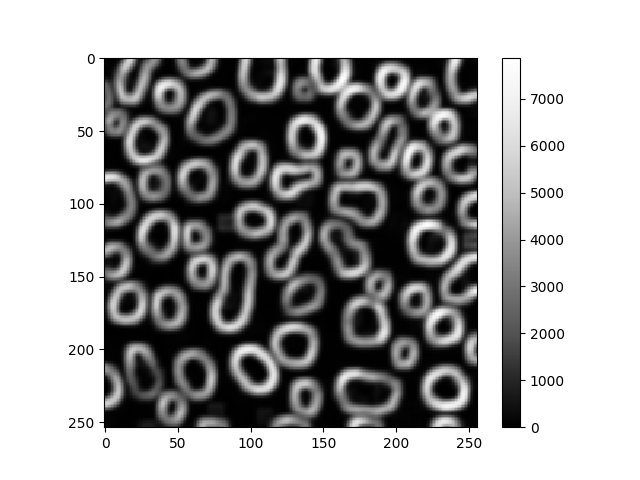
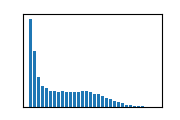

In [7]:
blobs_edges = cle.variance_filter(blobs, radius_x=5, radius_y=5)
blobs_edges

# Local standard deviation

Which is obtained by the square-root of the local Variance

array([[12.245514 , 11.854456 , 11.134953 , ..., 17.529514 , 17.80661  ,
        17.605408 ],
       [12.347538 , 11.975888 , 11.361906 , ..., 16.456303 , 16.822775 ,
        16.787138 ],
       [12.38501  , 12.038501 , 11.542832 , ..., 15.215238 , 15.630464 ,
        15.71024  ],
       ...,
       [13.066175 , 12.763581 , 12.427642 , ...,  3.0827184,  2.7531435,
         2.909092 ],
       [12.738217 , 12.559896 , 12.39453  , ...,  2.4111853,  1.7367209,
         1.8676978],
       [12.44451  , 12.331953 , 12.302496 , ...,  1.867696 ,  0.       ,
         0.       ]], shape=(254, 256), dtype=float32, mtype=buffer)
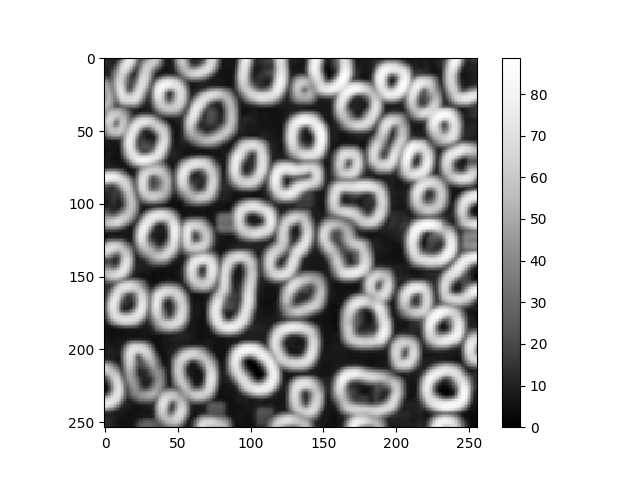
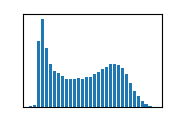

In [8]:
blobs_edges = cle.standard_deviation(blobs, radius_x=5, radius_y=5)
blobs_edges

## Edge detection filter do not enhancement edges in Biology

Intuitively, one could apply an edge detection filter to "enhance" edges in biological images marking cell membranes. But these filter responds to gradient from which we can detect edges of object. If applied on membrane, which are defined by two gradient edge, you will obtain a double edge response making the output more complicated.

By definition we call a strong change of gradient in a direction an "edge" and two strong opposite gradient change in the same direction is a "ridge".

Let's try with a 3D image showing membranes

array([[ 65,  91,  83, ...,  45,  36,  32],
       [ 51,  71,  79, ...,  80,  73,  70],
       [ 56,  75,  86, ...,  99, 102,  93],
       ...,
       [ 76, 104,  93, ...,  29,  44,  32],
       [ 79, 111,  93, ...,  35,  29,  40],
       [ 83,  94,  75, ...,  39,  26,  28]], shape=(256, 256), dtype=uint8, mtype=buffer)
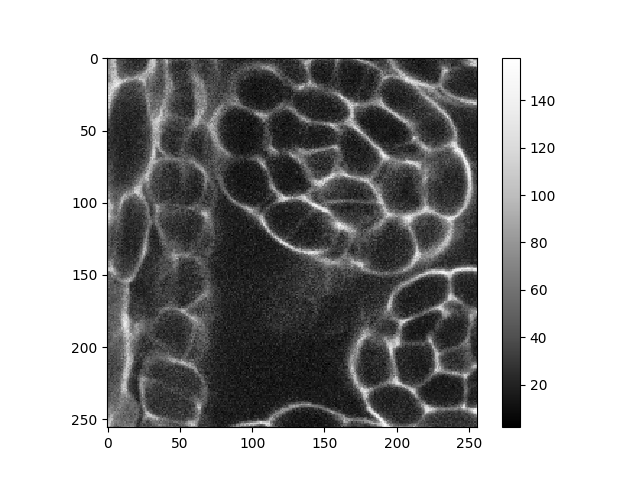
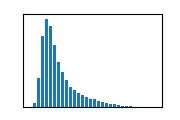

In [9]:
image = cle.push(imread("https://github.com/clEsperanto/clesperanto_example_data/raw/main/EM_C_6_c0.tif"))
image[10]

array([[ 436.53638 ,  445.38522 ,  329.05167 , ...,  710.66376 ,
         565.947   ,  518.7167  ],
       [ 375.60617 ,  440.23175 ,  485.67477 , ..., 1006.9414  ,
        1040.1823  , 1017.3416  ],
       [ 309.5723  ,  427.35815 ,  485.3401  , ...,  291.97775 ,
         561.4588  ,  584.386   ],
       ...,
       [ 420.46997 ,  254.54272 ,  488.21613 , ...,   92.36883 ,
          75.43871 ,   99.975   ],
       [ 345.38528 ,  210.46616 ,  523.4463  , ...,   43.943146,
          95.55627 ,  101.764435],
       [ 242.98148 ,  302.5095  ,  460.55945 , ...,   61.122826,
          43.68066 ,  105.95754 ]], shape=(256, 256), dtype=float32, mtype=buffer)
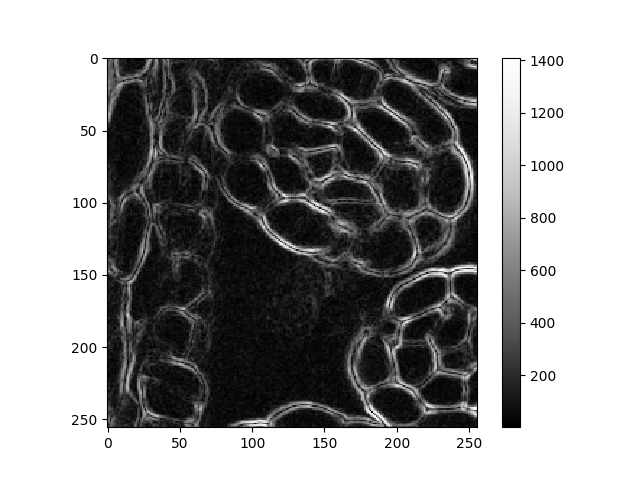
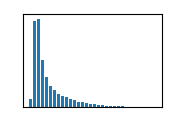

In [15]:
image_sobel = cle.sobel(image)
image_sobel[10]

When looking very carefully, you may observe that the edges are a bit thicker in the second image. The edge detection filter detects two edges, the increasing signal side of the membrane and the decreasing signal on the opposite side.

Edge detection filters return a double response when facing a ridge shape object.

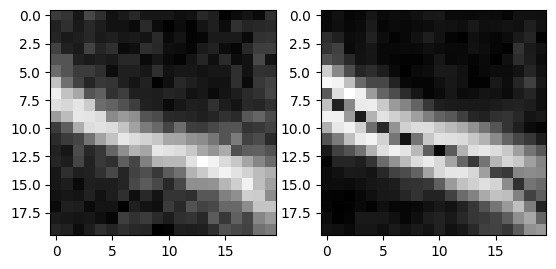

In [11]:
fig, axs = plt.subplots(1, 2)
cle.imshow(                image[60, 125:145, 135:155], plot=axs[0])
cle.imshow(cle.pull(image_sobel)[60, 125:145, 135:155], plot=axs[1])

Thus, to enhance edges in a membrane image, other filters are more useful. Enhancement may for example be making membranes thicker and potentially closing gaps in the signal.
Here are several other filters that could help you do this ...

## Local standard deviation

array([[20.517433 , 21.755314 , 21.551792 , ..., 24.58764  , 26.532543 ,
        27.743555 ],
       [20.898462 , 22.17737  , 21.973505 , ..., 24.92268  , 27.131617 ,
        29.107712 ],
       [21.177965 , 22.743818 , 22.471834 , ..., 24.152378 , 26.088652 ,
        27.8508   ],
       ...,
       [13.7053175, 15.311604 , 17.056923 , ...,  7.391827 ,  7.9432707,
         8.509558 ],
       [13.249891 , 15.361335 , 17.05512  , ...,  6.2428255,  6.4615006,
         6.695809 ],
       [12.938981 , 15.194426 , 17.137255 , ...,  5.62117  ,  5.716273 ,
         5.756531 ]], shape=(256, 256), dtype=float32, mtype=buffer)
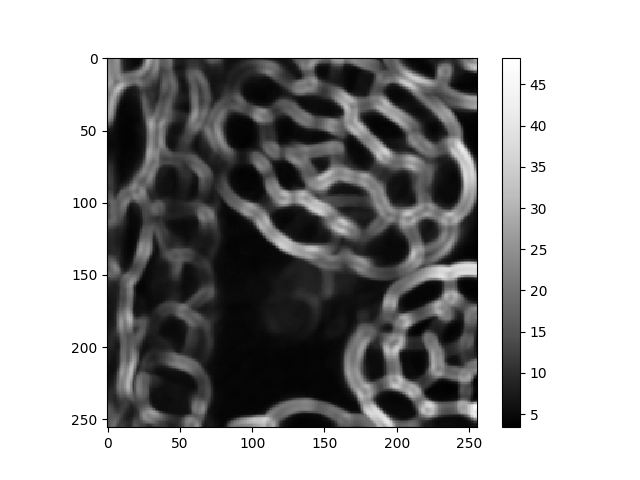
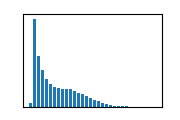

In [14]:
image_std = cle.standard_deviation(image, radius_x=5, radius_y=5, radius_z=5, connectivity="sphere")
image_std[10]

## Local maximum

array([[141, 141, 141, ..., 127, 129, 127],
       [141, 141, 141, ..., 129, 129, 132],
       [141, 141, 141, ..., 132, 132, 137],
       ...,
       [126, 126, 126, ...,  68,  68,  77],
       [126, 126, 126, ...,  68,  68,  68],
       [126, 126, 126, ...,  54,  54,  54]], shape=(256, 256), dtype=uint8, mtype=buffer)
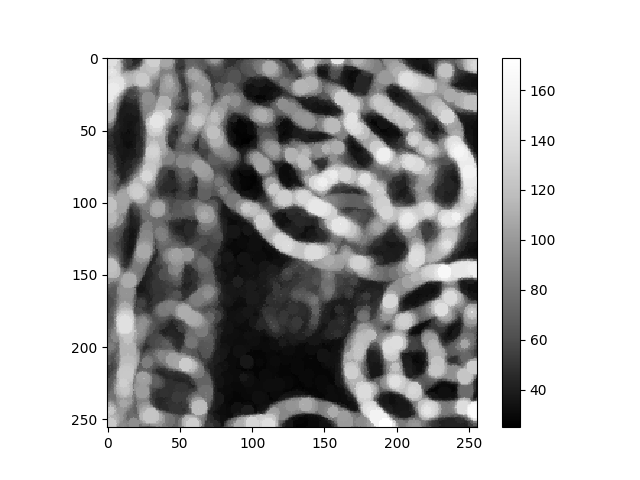
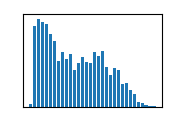

In [13]:
image_max = cle.maximum_filter(image, radius_x=5, radius_y=5, radius_z=5, connectivity="sphere")
image_max[10]

Alternatively, it is also possible to rely on more advance filters for [ridge detection](./ridge_detection.ipynb).